In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
from sklearn.model_selection import KFold, StratifiedKFold

In [445]:
# https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
df = pd.read_csv('../../data/telecom_churn.csv')

In [446]:
y = df["Churn"].astype(int)

In [447]:
X = df.drop(columns=['Churn'])

## Task 1

Убедиться, что StratifiedKFold в отличии от KFold сохраняет соотношение классов. (Дописать код, вывести таблицы/графики соотношения для KFold и StratifiedKFold). Привести случай, когда KFold будет работать очень плохо

X shape: (3333, 19)
y_shape: (3333,)
y lables name: Int64Index([0, 1], dtype='int64')
y lables count:
 0    2850
1     483
Name: Churn, dtype: int64
--------------------------------------------------

 * KFold method * 
Train: 
       X_shape  y_shape     0    1 ratio(1/(0+1))
1  (2499, 19)  (2499,)  2124  375        0.15006
2  (2500, 19)  (2500,)  2120  380          0.152
3  (2500, 19)  (2500,)  2153  347         0.1388
4  (2500, 19)  (2500,)  2153  347         0.1388
Test: 
      X_shape y_shape    0    1 ratio(1/(0+1))
1  (834, 19)  (834,)  726  108       0.129496
2  (833, 19)  (833,)  730  103       0.123649
3  (833, 19)  (833,)  697  136       0.163265
4  (833, 19)  (833,)  697  136       0.163265


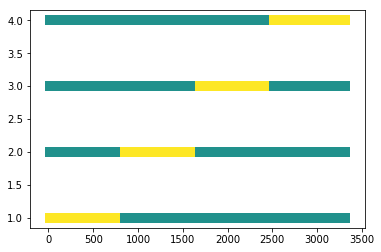

In [451]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

kf = KFold(n_splits=4)
skf = StratifiedKFold(n_splits=4)

print('X shape:', X.shape)
print('y_shape:', y.shape)
print('y lables name:', y.value_counts().keys())
print('y lables count:\n', y.value_counts())
print('-'*50)
print()

print(' * KFold method * ')
columns = ['X_shape', 'y_shape', 0, 1]
kf_df_train = pd.DataFrame(columns=columns)
kf_df_test = pd.DataFrame(columns=columns)
Xy_train_shape = []
Xy_test_shape = []
i = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_train_vc = y.iloc[train_index].value_counts()
    y_test_vc = y.iloc[test_index].value_counts()
    
    i += 1
    kf_df_train.loc[i] = [X_train.shape] + [y_train.shape] + [y_train_vc[0]] + [y_train_vc[1]]
    kf_df_test.loc[i] = [X_test.shape] + [y_test.shape] + [y_test_vc[0]] + [y_test_vc[1]]
    
    ## plot
    indeces = np.array([np.nan] * len(X))
    indeces[train_index] = 0
    indeces[test_index] = 1

    plt.scatter(x=range(len(indeces)), y=(np.array([1] * len(X)))*i, 
               c=indeces, marker='_', lw=10, 
                   vmin=-1, vmax=1)
    ###
    
kf_df_train['ratio(1/(0+1))'] = kf_df_train[1]/(kf_df_train[1]+kf_df_train[0])
kf_df_test['ratio(1/(0+1))'] = kf_df_test[1]/(kf_df_test[1]+kf_df_test[0])

print('Train: \n',kf_df_train)
print('Test: \n', kf_df_test)


 * StratifiedKFold method * 
Train: 
       X_shape  y_shape     0    1 ratio(1/(0+1))
1  (2499, 19)  (2499,)  2137  362       0.144858
2  (2499, 19)  (2499,)  2137  362       0.144858
3  (2500, 19)  (2500,)  2138  362         0.1448
4  (2501, 19)  (2501,)  2138  363       0.145142
Test: 
      X_shape y_shape    0    1 ratio(1/(0+1))
1  (834, 19)  (834,)  713  121       0.145084
2  (834, 19)  (834,)  713  121       0.145084
3  (833, 19)  (833,)  712  121       0.145258
4  (832, 19)  (832,)  712  120       0.144231


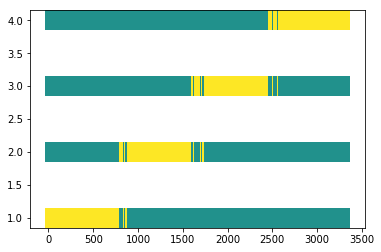

In [452]:
print(' * StratifiedKFold method * ')

columns = ['X_shape', 'y_shape', 0, 1]
kf_df_train = pd.DataFrame(columns=columns)
kf_df_test = pd.DataFrame(columns=columns)
Xy_train_shape = []
Xy_test_shape = []
i = 0

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_train_vc = y.iloc[train_index].value_counts()
    y_test_vc = y.iloc[test_index].value_counts()
    
    i += 1
    kf_df_train.loc[i] = [X_train.shape] + [y_train.shape] + [y_train_vc[0]] + [y_train_vc[1]]
    kf_df_test.loc[i] = [X_test.shape] + [y_test.shape] + [y_test_vc[0]] + [y_test_vc[1]]
    
    ## plot
    indeces = np.array([np.nan] * len(X))
    indeces[train_index] = 0
    indeces[test_index] = 1

    plt.scatter(x=range(len(indeces)), y=(np.array([1] * len(X)))*i, 
               c=indeces, marker='_', lw=20, 
                   vmin=-1, vmax=1)
    ###
    
    
kf_df_train['ratio(1/(0+1))'] = kf_df_train[1]/(kf_df_train[1]+kf_df_train[0])
kf_df_test['ratio(1/(0+1))'] = kf_df_test[1]/(kf_df_test[1]+kf_df_test[0])

print('Train: \n',kf_df_train)
print('Test: \n', kf_df_test)

In [456]:
print(' * bad split for Kfold * ' )

X = np.ones(100)
y = np.append(np.zeros(50), np.ones(50))

columns = [0, 1]
kf_df_train = pd.DataFrame(columns=columns)
kf_df_test = pd.DataFrame(columns=columns)
i = 0

for train_index, test_index in kf.split(X):   
    y_train = [(y[train_index] == 0).sum(), (y[train_index] == 1).sum()]
    y_test = [(y[test_index] == 0).sum(), (y[test_index] == 1).sum()]

    i += 1
    kf_df_train.loc[i] = y_train
    kf_df_test.loc[i] = y_test    
    
#     ## plot
#     indeces = np.array([np.nan] * len(X))
#     indeces[train_index] = 0
#     indeces[test_index] = 1

#     plt.scatter(x=range(len(indeces)), y=(np.array([1] * len(X)))*i, 
#                c=indeces, marker='_', lw=10, 
#                    vmin=-1, vmax=1)
#     ###
    
kf_df_train['ratio(1/(0+1))'] = kf_df_train[1]/(kf_df_train[1]+kf_df_train[0])
kf_df_test['ratio(1/(0+1))'] = kf_df_test[1]/(kf_df_test[1]+kf_df_test[0])

print('Train: \n',kf_df_train)
print('Test: \n', kf_df_test)

 * bad split for Kfold * 
Train: 
     0   1 ratio(1/(0+1))
1  25  50       0.666667
2  25  50       0.666667
3  50  25       0.333333
4  50  25       0.333333
Test: 
     0   1 ratio(1/(0+1))
1  25   0              0
2  25   0              0
3   0  25              1
4   0  25              1


In [457]:
print(' * StratifiedKFold split * ')

columns = [0, 1]
kf_df_train = pd.DataFrame(columns=columns)
kf_df_test = pd.DataFrame(columns=columns)
i = 0

for train_index, test_index in skf.split(X, y): 
    y_train = [(y[train_index] == 0).sum(), (y[train_index] == 1).sum()]
    y_test = [(y[test_index] == 0).sum(), (y[test_index] == 1).sum()]

    i += 1
    kf_df_train.loc[i] = y_train
    kf_df_test.loc[i] = y_test    
    
kf_df_train['ratio(1/(0+1))'] = kf_df_train[1]/(kf_df_train[1]+kf_df_train[0])
kf_df_test['ratio(1/(0+1))'] = kf_df_test[1]/(kf_df_test[1]+kf_df_test[0])

print('Train: \n',kf_df_train)
print('Test: \n', kf_df_test)

 * StratifiedKFold split * 
Train: 
     0   1 ratio(1/(0+1))
1  37  37            0.5
2  37  37            0.5
3  38  38            0.5
4  38  38            0.5
Test: 
     0   1 ratio(1/(0+1))
1  13  13            0.5
2  13  13            0.5
3  12  12            0.5
4  12  12            0.5


## Task 2
Написать функцию, которая будет находить наилучшее разбиение(по индексу). 

Вход: для листа с целочисленными значениями inp = [0, 1, 0, 0, 1, 1, 1, 0] . <br>
Выход: индекс, по которому наиболее оптимально разбить выборку. <br>

(Применить энтропию Шеннона)

In [516]:
inp = [0, 1, 0, 0, 1, 1, 1, 0]

def split(inp):

#     unique, counts = np.unique(inp, return_counts=True)

#     entropia = sum([-i/counts.sum()*np.log2(i/counts.sum()) for i in counts])
    return



0

## Task 3

применить свежеизученные алгоритмы (Дерево Решений, Случайный Лес, XGBoost) для задачи регрессии (оценка недвижимости https://www.kaggle.com/harlfoxem/housesalesprediction). Решение по данной задаче слать отдельным ноутбуком


In [514]:
#df = pd.read_csv('../../data/kc_house_data.csv')

In [515]:
#df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
